In [1]:
#text clustering
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/drive/My Drive/all_news_Set2.csv')
df.head()

,_id,topic,content
0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide..."
1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons..."
2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB..."
3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack..."
4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s..."


In [4]:
df.shape

(3336, 3)

In [5]:
df.topic.nunique()

68

In [6]:
df.topic.isnull().sum()

1096

In [8]:
df = df[df['content'].notna()]
df = df[df['topic'].notna()]

In [9]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# data preprocessing
stemmer = SnowballStemmer(language='english',ignore_stopwords=True)
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [11]:
# preview after preprocessing
doc_sample = df.content[1]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['["The', 'government', 'is', 'weighing', 'the', 'pros', 'and', 'cons', 'of', 'halting', 'imports,', 'including', 'that', 'from', 'China,', 'on', 'India’s', 'manufacturing', 'sector', 'and', 'the', 'commerce', 'ministry', 'will', 'soon', 'submit', 'to', 'the', 'prime', 'minister’s', 'office', 'a', 'list', 'of', 'items', 'of', 'inward', 'shipments', 'that', 'can', 'be', 'restricted', 'in', 'the', 'near', 'future', 'without', 'impacting', 'domestic', 'manufacturing.","The', 'government', 'has', 'held', 'various', 'meetings', 'in', 'the', 'past', 'two', 'weeks', 'with', 'sectoral', 'experts', 'and', 'businesses', 'and', 'is', 'now', 'preparing', 'an', 'official', 'list', 'of', 'commodities', 'that', 'can', 'be', 'locally', 'manufactured,', 'an', 'official', 'said,', 'adding', 'that', 'ample', 'caution', 'will', 'be', 'maintained', 'before', 'taking', 'any', 'decision', 'even', 'as', 'voices', 'against', 'Chinese', 'goods', 'have', 'been', 'gaining', 'momentum.","The', 

In [13]:

df['processed_topic'] = df1['topic'].map(preprocess)
df['processed_content'] = df['content'].map(preprocess)

df['processed_topic'] = df['processed_topic'].apply(lambda x: ' '.join(x))
df['processed_content'] = df['processed_content'].apply(lambda x: ' '.join(x))
df.head()

,_id,topic,content,processed_topic,processed_content
0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",nation,west bengal govern tuesday decid impos complet...
1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",busi,govern weigh pros con halt import includ china...
2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",nation,central board secondari educ cbse slash syllab...
3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",intern,world health organ tuesday acknowledg emerg ev...
4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",intern,presid donald trump tuesday formal start withd...


End of data preprocessing

In [ ]:
#df.to_csv('/content/drive/My Drive/edited_topics_all_news_set2.csv')

The Nouns from content for topic Modeling and storing in separate column

In [14]:
#topic modelling
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

random_state = 0

def only_nouns(texts):
    output = []
    for doc in nlp.pipe(texts):
        noun_text = " ".join(token.lemma_ for token in doc if token.pos_ == 'NOUN')
        output.append(noun_text)
    return output


df['noun_content'] = only_nouns(df['content'])

df.head()

,_id,topic,content,processed_topic,processed_content,noun_content
0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",nation,west bengal govern tuesday decid impos complet...,government lockdown containment zone case casu...
1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",busi,govern weigh pros con halt import includ china...,government pro con import manufacturing sector...
2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",nation,central board secondari educ cbse slash syllab...,syllabus class third year country pandemic imp...
3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",intern,world health organ tuesday acknowledg emerg ev...,"\""emerging evidence\ spread group scientist bo..."
4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",intern,presid donald trump tuesday formal start withd...,withdrawal threat body funding source response...


In [15]:
# df.to_csv('/content/drive/My Drive/edited_topics_set2_with_noun_content.csv')

To count total words in content


In [18]:
# to count words
df['body_word_count'] = df['processed_content'].apply(lambda x: len(x.strip().split()))  # word count in abstract

df['body_unique_words']=df['processed_content'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df.head(20)

,_id,topic,content,processed_topic,processed_content,noun_content,body_word_count,body_unique_words
0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",nation,west bengal govern tuesday decid impos complet...,government lockdown containment zone case casu...,215,110
1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",busi,govern weigh pros con halt import includ china...,government pro con import manufacturing sector...,140,109
2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",nation,central board secondari educ cbse slash syllab...,syllabus class third year country pandemic imp...,143,110
3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",intern,world health organ tuesday acknowledg emerg ev...,"\""emerging evidence\ spread group scientist bo...",35,32
4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",intern,presid donald trump tuesday formal start withd...,withdrawal threat body funding source response...,320,203
5,5f04e4a1ef217aae6a201f76,"[""National""]","[""Andhra Pradesh police arrested 12 employees ...",nation,andhra pradesh polic arrest employe polym incl...,police employee director connection gas leak m...,166,126
6,5f04e4a3ef217aae6a201f77,"[""National""]","[""Vaccine maker Serum Institute of India (SII)...",nation,vaccin maker serum institut india hop develop ...,"vaccine maker vaccine year end \""good safe\ pr...",163,103
7,5f04e4a5ef217aae6a201f78,"[""International""]","[""Brazil's President Jair Bolsonaro says he ha...",intern,brazil presid jair bolsonaro say test posit co...,Covid-19 month virus severity test result mask...,187,136
8,5f04e4a8ef217aae6a201f79,"[""National""]","[""India remains cautious as China has not yet ...",nation,india remain cautious china show sign thin lar...,sign number troop area side boundary side line...,275,147
9,5f04e4abef217aae6a201f7a,"[""National""]","[""In a trend that compounds concern, the total...",nation,trend compound concern total number covid case...,trend concern number case virus province pande...,90,59


Total no of topics analysis

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

There are 53 news categories


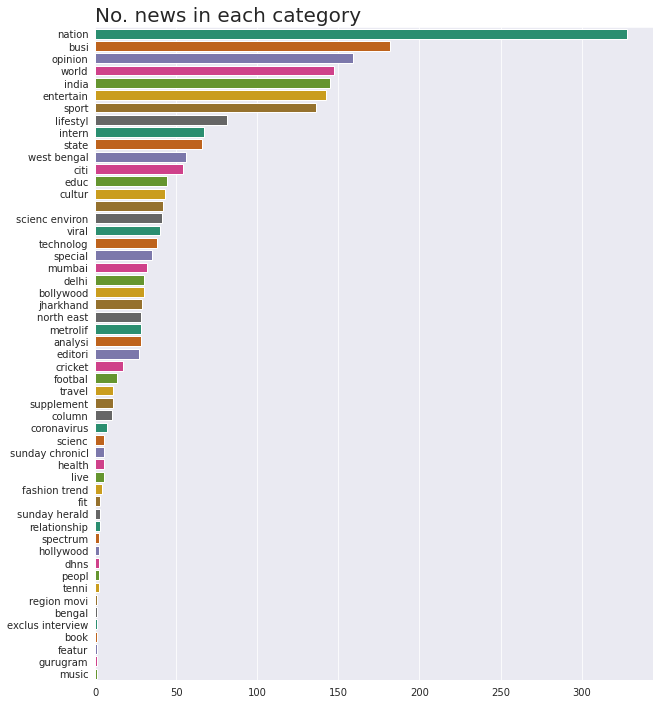

In [21]:
#No. of contents in each category
count_df = pd.DataFrame(df['processed_topic'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='processed_topic', palette='Dark2')
plt.title('No. news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()